# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [23]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split


boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = boston.drop(columns = ['medv']).copy()
y = boston[['medv']]

In [24]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [25]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [7]:
# verificar tipos das colunas - apenas valores numéricos
boston.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [9]:
# verificar se há valores faltantes
boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [12]:
boston.corr().tail(1)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
medv,-0.388305,0.360445,-0.483725,0.17526,-0.427321,0.69536,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663,1.0


A variável ``LSTAT`` (%status inferior da população) apresenta um potencial preditivo, com cerca de 74% de correlação negativa. A variável ``RM`` (número médio de quartos por habitação) também parece apresentar potencial preditivo, com cerca de 70% de correlação positiva. 

### 3. Separe os dados em validação e teste

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (354, 13)
X_test: (152, 13)
y_train: (354, 1)
y_test: (152, 1)


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [27]:
regr1 = DecisionTreeRegressor(max_depth=2, random_state=200)
regr2 = DecisionTreeRegressor(max_depth=8, random_state=200)

regr1.fit(X_train, y_train)
regr2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=200)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [28]:
mse1_train = regr1.score(X_train, y_train)
mse1_test = regr1.score(X_test, y_test)

mse2_train = regr2.score(X_train, y_train)
mse2_test = regr2.score(X_test, y_test)


template1 = "O coeficiente de determinação da árvore com profundidade={0} é: {1:.2f} para a base de treinamento"
template2 = "O coeficiente de determinação da árvore com profundidade={0} é: {1:.2f} para a base de teste"

print(template1.format(regr1.get_depth(),mse1_train).replace(".",","))
print(template1.format(regr2.get_depth(),mse2_train).replace(".",","))
print(template2.format(regr1.get_depth(),mse1_test).replace(".",","))
print(template2.format(regr2.get_depth(),mse2_test).replace(".",","))

O coeficiente de determinação da árvore com profundidade=2 é: 0,73 para a base de treinamento
O coeficiente de determinação da árvore com profundidade=8 é: 0,98 para a base de treinamento
O coeficiente de determinação da árvore com profundidade=2 é: 0,61 para a base de teste
O coeficiente de determinação da árvore com profundidade=8 é: 0,73 para a base de teste


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

Com base no coeficiente de determinação, a árvore que parece mais adequada é a árvore 2 (com profundidade=8). 

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

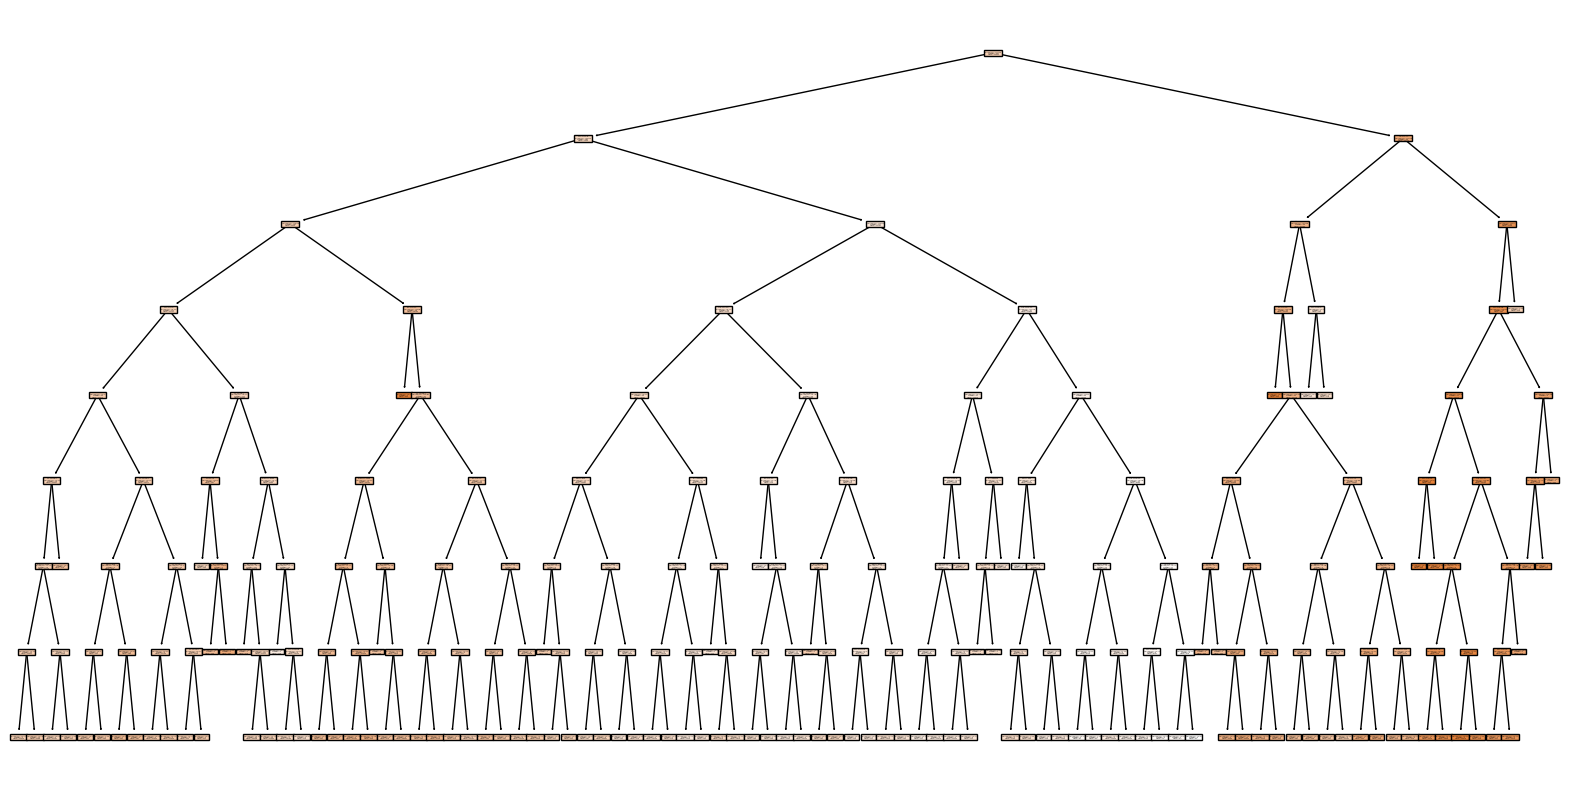

In [38]:
plt.rc('figure', figsize=(20,10))
tree2= tree.plot_tree(regr2,
                      feature_names=X.columns,
                      filled=True)

In [39]:
representacao_textual = tree.export_text(regr2)
print(representacao_textual)

|--- feature_5 <= 6.95
|   |--- feature_12 <= 14.75
|   |   |--- feature_5 <= 6.55
|   |   |   |--- feature_12 <= 7.57
|   |   |   |   |--- feature_11 <= 393.29
|   |   |   |   |   |--- feature_9 <= 548.00
|   |   |   |   |   |   |--- feature_10 <= 19.95
|   |   |   |   |   |   |   |--- feature_2 <= 4.89
|   |   |   |   |   |   |   |   |--- value: [22.62]
|   |   |   |   |   |   |   |--- feature_2 >  4.89
|   |   |   |   |   |   |   |   |--- value: [23.88]
|   |   |   |   |   |   |--- feature_10 >  19.95
|   |   |   |   |   |   |   |--- feature_4 <= 0.53
|   |   |   |   |   |   |   |   |--- value: [21.17]
|   |   |   |   |   |   |   |--- feature_4 >  0.53
|   |   |   |   |   |   |   |   |--- value: [23.10]
|   |   |   |   |   |--- feature_9 >  548.00
|   |   |   |   |   |   |--- value: [27.50]
|   |   |   |   |--- feature_11 >  393.29
|   |   |   |   |   |--- feature_9 <= 262.00
|   |   |   |   |   |   |--- feature_6 <= 26.60
|   |   |   |   |   |   |   |--- feature_8 <= 3.50
|   |   |

A variável que parece ser mais importante é a da primeira quebra da árvore (provavelmente com o menor Erro Quadrático Médio (EQM) entre todas as variáveis): ``RM``, que representa o número médio de quartos por habitação.